#    Stock Price Prediction


# NAME : NIKHIL BIRADAR
#               CORIZO ML INTERN

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [3]:
data =pd.read_excel('Stock_Price_data_set.xlsx')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 55.3 KB


In [5]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 55.3 KB


In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1009, 1)

In [10]:
X_train = []
y_train = []

for i in range (60,1009): 
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [11]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(949, 60, 1)

In [12]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [13]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
30/30 - 15s - loss: 0.0291 - 15s/epoch - 500ms/step
Epoch 2/20
30/30 - 5s - loss: 0.0064 - 5s/epoch - 165ms/step
Epoch 3/20
30/30 - 5s - loss: 0.0061 - 5s/epoch - 156ms/step
Epoch 4/20
30/30 - 4s - loss: 0.0057 - 4s/epoch - 147ms/step
Epoch 5/20
30/30 - 4s - loss: 0.0065 - 4s/epoch - 139ms/step
Epoch 6/20
30/30 - 4s - loss: 0.0064 - 4s/epoch - 137ms/step
Epoch 7/20
30/30 - 4s - loss: 0.0052 - 4s/epoch - 140ms/step
Epoch 8/20
30/30 - 5s - loss: 0.0044 - 5s/epoch - 152ms/step
Epoch 9/20
30/30 - 4s - loss: 0.0044 - 4s/epoch - 144ms/step
Epoch 10/20
30/30 - 4s - loss: 0.0044 - 4s/epoch - 141ms/step
Epoch 11/20
30/30 - 4s - loss: 0.0040 - 4s/epoch - 144ms/step
Epoch 12/20
30/30 - 5s - loss: 0.0043 - 5s/epoch - 151ms/step
Epoch 13/20
30/30 - 5s - loss: 0.0039 - 5s/epoch - 156ms/step
Epoch 14/20
30/30 - 5s - loss: 0.0040 - 5s/epoch - 165ms/step
Epoch 15/20
30/30 - 4s - loss: 0.0039 - 4s/epoch - 149ms/step
Epoch 16/20
30/30 - 4s - loss: 0.0037 - 4s/epoch - 144ms/step
Epoch 17/20
30/

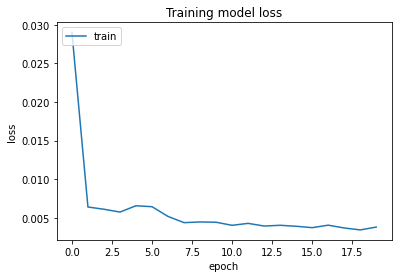

In [14]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [15]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [16]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 2s 35ms/step


array([[1.5848405],
       [1.5848049],
       [1.5903857],
       [1.6005751],
       [1.6109581],
       [1.6153473],
       [1.6119853],
       [1.603389 ],
       [1.5951953],
       [1.5899527],
       [1.5832691],
       [1.5745026],
       [1.5659654],
       [1.5577316],
       [1.5532494],
       [1.5530367],
       [1.561253 ],
       [1.5774672],
       [1.598973 ],
       [1.6230427],
       [1.6391697],
       [1.645808 ],
       [1.6405249],
       [1.6261387],
       [1.60862  ],
       [1.5938965],
       [1.5845206],
       [1.5783777],
       [1.5709667],
       [1.562608 ],
       [1.5538347],
       [1.5441666],
       [1.5308735],
       [1.5142016],
       [1.5036185],
       [1.5035808],
       [1.5127642],
       [1.5272956],
       [1.5442562],
       [1.5571173],
       [1.5696483],
       [1.5827503],
       [1.596621 ],
       [1.6097647],
       [1.6200309],
       [1.6247203],
       [1.6221305],
       [1.6174463],
       [1.614252 ],
       [1.6149035],


In [17]:
predicted_price = sc.inverse_transform(y_pred)

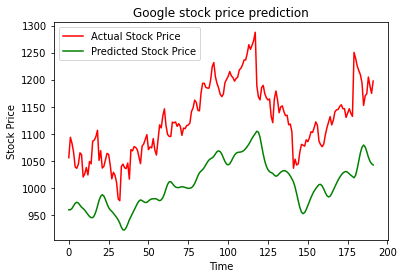

In [18]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()